<a href="https://www.kaggle.com/code/shivanigiri/ml-beginner?scriptVersionId=181110028" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Import data from files
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

head() method is used to check the variables in the dataset.


In [3]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


****Data cleaning:Checking is any null values,filling null values using pandas method.

****using isnull() method for checking is there any null values in the dataset and boolen is returned by the method which stores True for missing values and False for not null values.



In [5]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

****As we can see that there is missing values for some variables like 'Age','Cabin','Embarked'.We will try to fill these values using appropriate methods of filling.fillna() manages to replace missing values in datasets with some desired values.

In [7]:
train['Age'].fillna(train['Age'].median(), inplace = True)#MEDIAN : Suitable for continuous data with outliers
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)#Mode: For categorical feature we can select to fill in the missing values with the most common value(mode).
#similarly for test dataset
test['Age'].fillna(test['Age'].median(), inplace = True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [8]:

#drop() method is used to drop the specific columns from the dataset.
train_data=train.drop(columns=['PassengerId','Name','Ticket','Cabin'])
test_data=test.drop(columns=['PassengerId','Name','Ticket','Cabin'])


****Data visualization: Graphical representation of the data

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Survival by Gender')

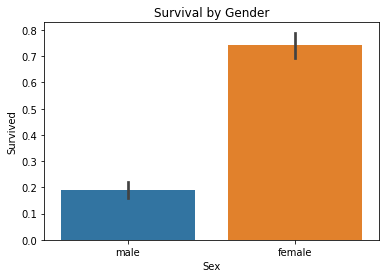

In [10]:
sns.barplot(x='Sex',y='Survived',data=train_data)
plt.title('Survival by Gender')

****Females have a much higher chance of survival than males.

Text(0.5, 1.0, 'Survival by socio-economic class')

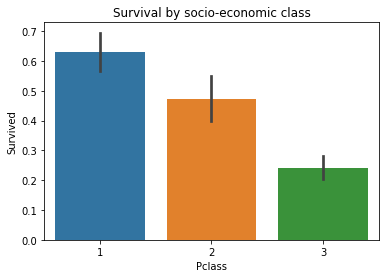

In [11]:
sns.barplot(x="Pclass",y='Survived', data=train_data)
plt.title('Survival by socio-economic class')

****People with higher socioeconomic class had a higher rate of survival.

Text(0.5, 1.0, 'Survival based on Embarkation')

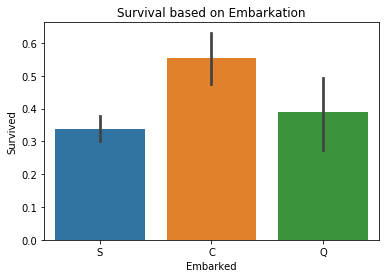

In [12]:
sns.barplot(x='Embarked',y='Survived',data=train_data)
plt.title('Survival based on Embarkation')

****People who embarked from C had higher rate of survival.

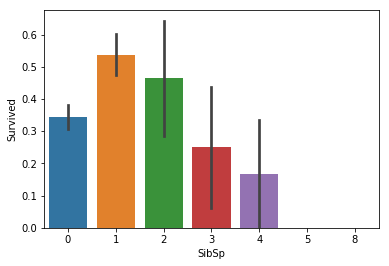

In [13]:
sns.barplot(x='SibSp',y='Survived',data=train_data)

****People with no siblings or spouses were less to likely to survive than those with one or two.

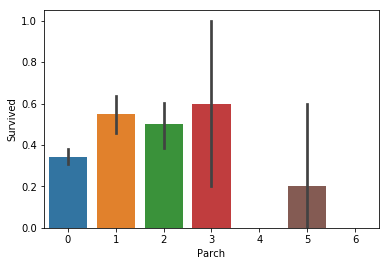

In [14]:
sns.barplot(x='Parch',y='Survived',data=train_data)

****People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

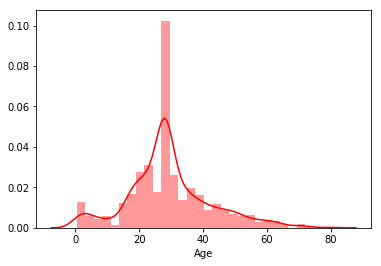

In [15]:
sns.distplot(train_data['Age'], bins=30, color='r')

Since data is cleaned,now we'll use descriptive statistics to explore more about our data.
groupby refers to process involving splitting(the data into groups based on criteria mentioned by the users),applying function to each group such as mean,count,max and combine the result.


In [16]:
train_data['Survived'].groupby(train_data['Pclass']).count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [17]:
train_data['Survived'].groupby(train_data['Age']<20).count()

Age
False    727
True     164
Name: Survived, dtype: int64

In [18]:
train_data['Survived'].groupby(train_data['SibSp']).count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

In [19]:
train_data['Survived'].groupby(train_data['Parch']).count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

In [20]:
train_data['Survived'].groupby(train_data['Sex']).count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [21]:
train_data['Survived'].groupby(train_data['Embarked']).count()

Embarked
C    168
Q     77
S    646
Name: Survived, dtype: int64

****Now,we'll convert categorical data to dummy variables for analysis using pandas method .

In [22]:
train_data1=pd.get_dummies(train_data,columns=['Sex','Embarked'])


In [23]:
test_data1=pd.get_dummies(test_data,columns=['Sex','Embarked'])

In [24]:
Y_train=train_data1['Survived'] #target 
X_train=train_data1.drop(columns=['Survived']) #feature variables
X_test=test_data1

In [25]:
from sklearn.model_selection import train_test_split #to create validation data set

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)
Y_pred = LR.predict(x_test)
acc_LR = accuracy_score(y_test, Y_pred)
print(acc_LR)
y_pred1=LR.predict(X_test)

0.7988826815642458


In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
Y_pred = gnb.predict(x_test)
acc_gnb=accuracy_score(y_test,Y_pred)
print(acc_gnb)
y_pred2=gnb.predict(X_test)

0.7988826815642458


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_kn=accuracy_score(y_test, Y_pred)
print(acc_kn)
y_pred3=knn.predict(X_test)

0.7262569832402235


In [29]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred2
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)
submission

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
